## 1.1绘制折线图

此图的作用是利用折线图表示中国银行2015-2019年营收入，可以更加直观的看出中国银行2015-2019年营收入的数据变化和走向

【例2-1】绘制中国银行2015-2019年营收入折线图

要求：1.设置x轴，y轴有标题；
      2.设置图标标题为“绘制中国银行2015-2019年营收入”；
      3.折线图要显示刻度

数据源：Revenue.xlsx

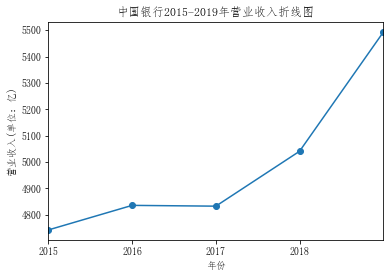

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['FangSong']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 不使用unicode_minus模式处理坐标轴轴线为负数的情况，


def get_data():  # 读取数据
    df = pd.read_excel('E:\项目文件\Python\Revenue.xlsx', header=None)
    data = df.values
    return data


def plt_show(data):
    x = np.linspace(2015, 2019, 5)
    y = data[1][1:]
    # print(x)
    # print(y)

    plt.plot(x, y,
             marker='o')
    # plt.xticks([2015, 2016, 2017, 2018, 2019])
    plt.xticks(range(2015, 2019))
    plt.xlim(2015,2019)
    plt.xlabel('年份')  # x轴标签
    plt.ylabel('营业收入(单位：亿)')  # y轴标签
    plt.title('中国银行2015-2019年营业收入折线图')  # 标题
    plt.show()


data = get_data()
plt_show(data)

In [1]:
from pyecharts import options as opts
from pyecharts.charts import Line
import pandas as pd
import numpy as np
from pyecharts.faker import Faker

# 读取数据
df = pd.read_excel('E:\项目文件\Python\可视化文档\Revenue.xlsx', header=None)
data = df.values

# 处理数据
x = ['2015', '2016', '2017', '2019']
y = data[1][1:]

# 绘制折线图
line = Line()
line.add_xaxis(x)
line.add_yaxis(series_name='',
               y_axis=y,
               symbol='circle')
line.set_global_opts(xaxis_opts=opts.AxisOpts(name='年份'),
                     yaxis_opts=opts.AxisOpts(name='营业收入(单位：亿)', min_=4600),
                     title_opts=opts.TitleOpts(title='中国银行2015-2019年营业收入折线图', pos_left='center'),
                     )

line.render_notebook()


## 疫情数据可视化

疫情数据—词云

In [2]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud  # 词云图
import pandas as pd
from collections import Counter


def get_data():  # 读取数据
    df = pd.read_csv('E:\项目文件\Python\疫情数据\疫情数据.csv', header=None)
    data = df.values
    return data


def split_word(data):  # 分词处理
    text = []
    for x in data[1:]:
        # print(x[1])
        text.append(x[1])
    # print(text)
    return text


def word_counter(words):  # 词频统计
    words_counter = Counter(words)
    words_list = words_counter.most_common(100)
    return words_list


def word_cloud(words):  # 生成词云
    wordcloud = WordCloud()
    wordcloud.add("",
                  words)
    wordcloud.set_global_opts(title_opts=opts.TitleOpts(title="疫情城市区-词云"))
#     wordcloud.render(r"E:\项目文件\Python\pyecharts\疫情词云.html")
#     wordcloud.render_notebook()
    return wordcloud


data = get_data()  # 读取数据
text = split_word(data)  # 分词处理
words_list = word_counter(text)  # 词频统计

wordcloud=word_cloud(words_list)  # 生成词云
wordcloud.render_notebook()

疫情数据-柱状图

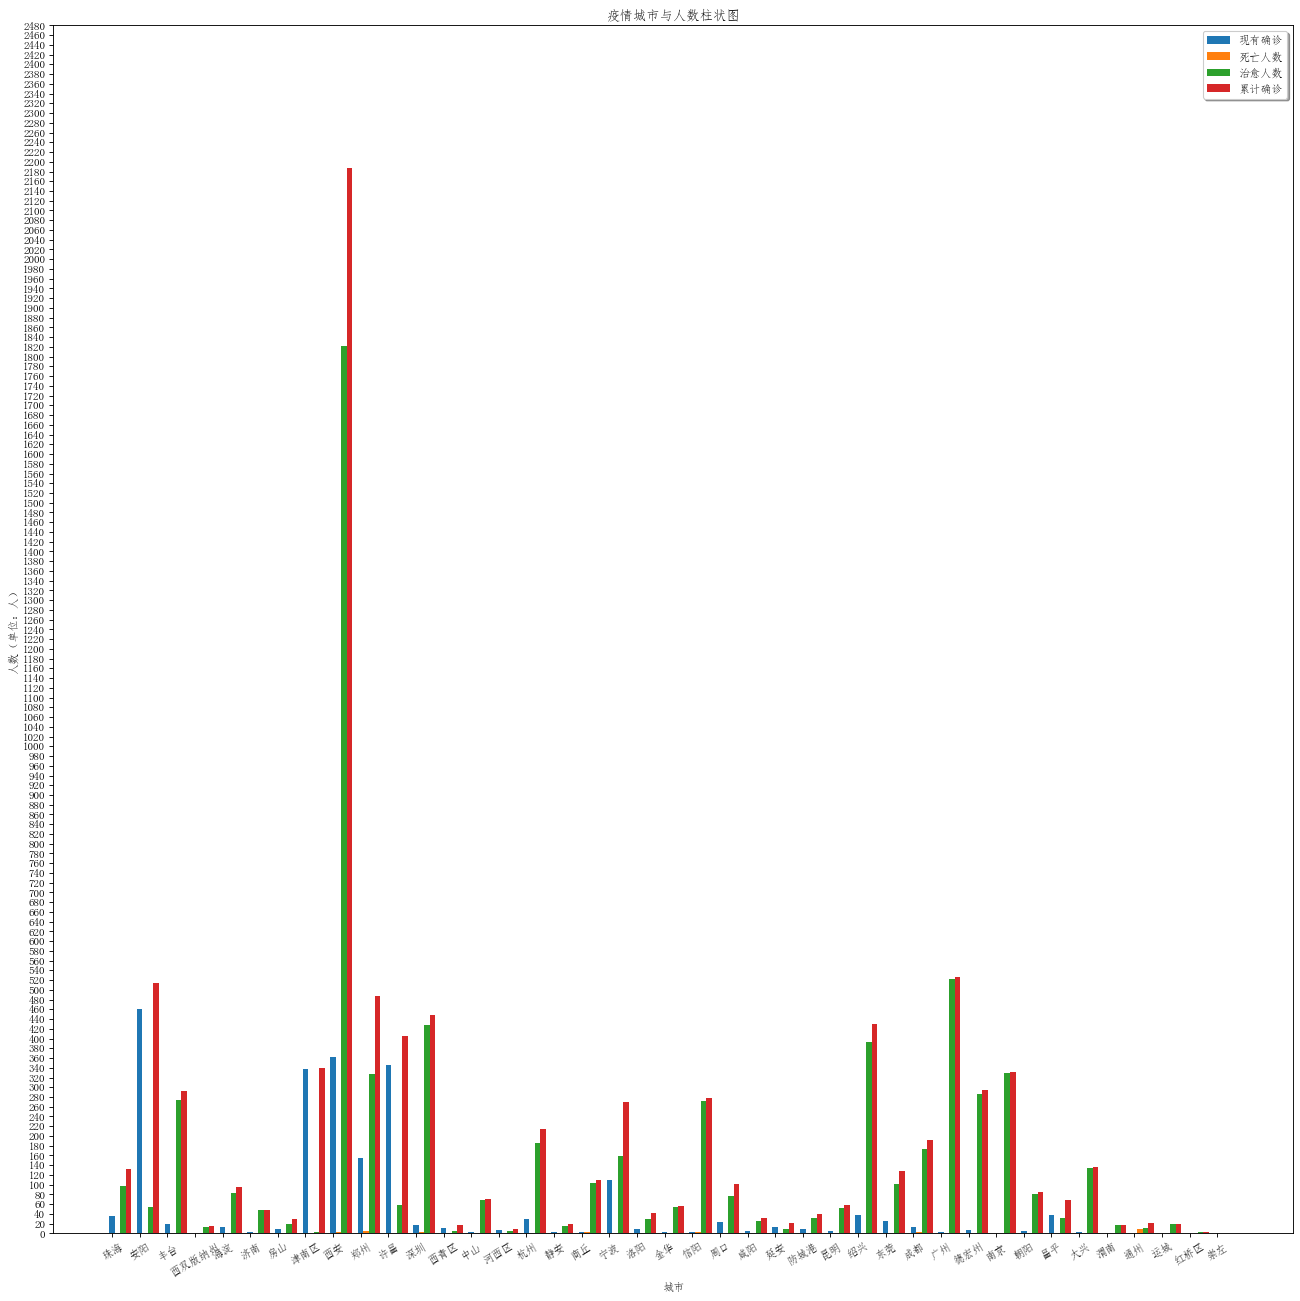

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('E:\项目文件\Python\疫情数据\疫情数据.csv', header=None)
data = df.values
bar_width = 0.2
x = [i[1] for i in data[1:]]
x1 = np.arange(0, 41, 1)
y1 = [int(i[2]) for i in data[1:]]
y1 = np.array(y1)
x2 = [i + bar_width for i in x1]
y2 = [int(i[3]) for i in data[1:]]
x3 = [i + bar_width for i in x2]
y3 = [int(i[4]) for i in data[1:]]
x4 = [i + bar_width for i in x3]
y4 = [int(i[7]) for i in data[1:]]

plt.figure(figsize=(20, 20), dpi=80)
plt.bar(x1, y1, width=bar_width, tick_label=x)
plt.bar(x2, y2, width=bar_width)
plt.bar(x3, y3, width=bar_width)
plt.bar(x4, y4, width=bar_width)

plt.xlabel('城市')  # x轴标题
plt.xticks(rotation=30)  # 旋转30度
plt.ylabel('人数（单位：人）')  # y轴标题

plt.yticks(np.arange(0, 2500, 20), np.arange(0, 2500, 20))
plt.title('疫情城市与人数柱状图')  # 图表标题
plt.legend(['现有确诊', '死亡人数', '治愈人数', '累计确诊'],
           loc='best',
           shadow=True,
           fancybox=True)  # 控制图例圆角或方角
plt.show()

In [1]:
import pandas as pd
from pyecharts.charts import Bar
from pyecharts import options as opts
from pyecharts.globals import ThemeType


def get_data():  # 读取数据
    df = pd.read_csv('E:\项目文件\Python\疫情数据\疫情数据.csv', header=None)
    data = df.values
    return data


def split_word(data):  # 分词处理
    text = []
    for x in data[1:]:
        # print(x[1])
        text.append(x[1])
    # print(text)
    return text


def get_people(data):  # 获取确诊总人数
    text = []
    for x in data[1:]:
        # print(x[1])
        text.append(x[7])
    # print(text)
    return text


def get_peopledead(data):  # 获取死亡人数
    text = []
    for x in data[1:]:
        # print(x[1])
        text.append(x[3])
    # print(text)
    return text


def get_peoplenow(data):  # 获取现有确诊人数
    text = []
    for x in data[1:]:
        # print(x[1])
        text.append(x[2])
    # print(text)
    return text


def get_peopleheal(data):  # 获取治愈人数
    text = []
    for x in data[1:]:
        # print(x[1])
        text.append(x[4])
    # print(text)
    return text


def bar_charts() -> Bar:  # 创建柱状图
    data = get_data()  # 读取数据
    text = split_word(data)  # 分词处理
    people_num = get_people(data)
    people_dead = get_peopledead(data)
    people_heal = get_peopleheal(data)
    people_now = get_peoplenow(data)

    bar = Bar(init_opts=opts.InitOpts(theme=ThemeType.LIGHT,
                                      width="1000px",
                                      height="800px"))

    bar.add_xaxis(text)
    bar.add_yaxis("累计确诊人数", people_num, stack='stack1')  # 堆叠效果
    bar.add_yaxis("现有确诊人数", people_now, stack='stack1')
    bar.add_yaxis("治愈人数", people_heal, stack='stack1')
    bar.add_yaxis("死亡人数", people_dead, stack='stack1')
    bar.set_global_opts(xaxis_opts=opts.AxisOpts(name="城市",
                                                 axislabel_opts=opts.LabelOpts(rotate=30)),  # x轴旋转
                        yaxis_opts=opts.AxisOpts(name="人数（单位：人）"),
                        title_opts=opts.TitleOpts(title="疫情城市与人数柱状图"),  # 标题
                        tooltip_opts=opts.TooltipOpts(trigger='axis',  # 触发类型
                                                      axis_pointer_type='cross',  # 指示器类型
                                                      )

                        )
    return bar


bar = bar_charts()
# bar.render(r"E:\项目文件\Python\pyecharts\疫情词云.html")
bar.render_notebook()

疫情数据-饼图

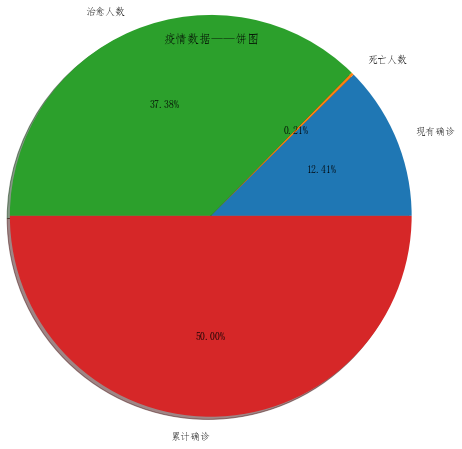

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('E:\项目文件\Python\疫情数据\疫情数据.csv', header=None)
data = df.values


def get_people(data):  # 获取确诊总人数
    num = 0
    for x in data[1:]:
        num += int(x[7])
    return num


def getpeople_now(data):  # 获取现有确诊总人数
    num = 0
    for x in data[1:]:
        num += int(x[2])
    return num


def get_peopledead(data):  # 获取死亡人数
    num = 0
    for x in data[1:]:
        num += int(x[3])
    return num


def get_peopleheal(data):  # 获取治愈人数
    num = 0
    for x in data[1:]:
        num += int(x[4])
    return num


people_num = get_people(data)  # 获取确诊总人数
people_now = getpeople_now(data)  # 获取现有确诊总人数
people_dead = get_peopledead(data)  # 获取死亡人数
people_heal = get_peopleheal(data)  # 获取治愈人数
x = ['现有确诊', '死亡人数', '治愈人数', '累计确诊']
y = [people_now, people_dead, people_heal, people_num]
# 绘制饼图
plt.figure(figsize=(6, 6.5))
plt.pie(x=y,  # 比例
        labels=x,  # 标签
        autopct='%.2lf%%',  # 比例数据的格式
        radius=1.5,
        shadow=True, )  # 阴影
plt.title('疫情数据——饼图',
          loc='center')
plt.show()

In [5]:
from pyecharts import options as opts
from pyecharts.charts import Pie
import pandas as pd


def get_data():  # 读取数据
    df = pd.read_csv('E:\项目文件\Python\疫情数据\疫情数据.csv', header=None)
    data = df.values
    return data


def split_word(data):  # 分词处理
    text = []
    for x in data[1:]:
        # print(x[1])
        text.append(x[1])
    # print(text)
    return text


data = get_data()  # 读取数据
text = split_word(data)  # 分词处理


def get_people(data):  # 获取确诊总人数
    num = 0
    for x in data[1:]:
        num += int(x[7])
    return num


def getpeople_now(data):  # 获取现有确诊总人数
    num = 0
    for x in data[1:]:
        num += int(x[2])
    return num


def get_peopledead(data):  # 获取死亡人数
    num = 0
    for x in data[1:]:
        num += int(x[3])
    return num


def get_peopleheal(data):  # 获取治愈人数
    num = 0
    for x in data[1:]:
        num += int(x[4])
    return num


def pie_charts() -> Pie:
    people_num = get_people(data)  # 获取确诊总人数
    people_now = getpeople_now(data)  # 获取现有确诊总人数
    people_dead = get_peopledead(data)  # 获取死亡人数
    people_heal = get_peopleheal(data)  # 获取治愈人数
    people = [("确诊总人数", people_num), ("现有确诊", people_now), ("死亡人数", people_dead), ("治愈人数", people_heal)]
    pie = Pie()
    pie.add("",
            people)
    pie.set_global_opts(title_opts=opts.TitleOpts(title="疫情数据——饼图"))
    pie.set_series_opts(label_opts=opts.LabelOpts(formatter="{b}:{c}"))
#     pie.render(r"E:\项目文件\Python\疫情数据可视化\疫情数据——饼图.html")
#     pie.render_notebook()
    return pie


pie=pie_charts()
pie.render_notebook()

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\项目文件\\Python\\疫情数据\\疫情数据.csv'

疫情数据-地理图

In [1]:
import pandas as pd
from pyecharts.charts import Map
from pyecharts import options as opts

df = pd.read_csv(r'D:\datasets\mldata\疫情数据3.csv')
data = df.values

x = [[i[0], i[1]]for i in data[0:]]

map = Map()
map.add(series_name="中国确诊病例分布",
        data_pair=x,
        maptype="china",
        is_map_symbol_show=False  # 是否选中图例
        )

map.set_global_opts(title_opts=opts.TitleOpts(title="中国疫情地图"),
                    visualmap_opts=opts.VisualMapOpts(
                        is_piecewise=True,  # 是否为分段型
                        pieces=[  # 自定义的每一段的范围，以及每一段的文字，以及每一段的特别的样式
                            {"min": 0, "max": 0, "label": "0人", "color": "white"},
                            {"min": 1, "max": 9, "label": "1-9人", "color": "#FFE6BE"},
                            {"min": 10, "max": 99, "label": "10-99人", "color": "#FFB769"},
                            {"min": 100, "max": 499, "label": "100-499人",
                             "color": "#FF8F66"},
                            {"min": 500, "max": 999, "label": "500-999人",
                             "color": "#ED514E"},
                            {"min": 1000, "max": 9999, "label": "1000-9999人",
                             "color": "#CA0D11"},
                            {"min": 10000, "max": 100000, "label": "10000人以上",
                             "color": "#A52A2A"}
                        ])
                    )

# map.render(r"E:\项目文件\Python\render.html")
map.render_notebook()

## 豆瓣评论数据化分析

豆瓣评论-词云

In [5]:
import jieba
from pyecharts import options as opts
from pyecharts.charts import WordCloud  # 词云图
from collections import Counter


def get_data():  # 读取数据
    with open('E:\项目文件\Python\爬虫题目1.txt', 'r', encoding='utf-8') as f:
        data = f.read().strip().replace('\n', '').replace(' ', '')
    return data


def split_word(data):  # 分词处理
    text = list(jieba.cut(data))
    return text


def word_counter(words):  # 词频统计
    words_counter = Counter(words)
    words_list = words_counter.most_common(2000)
    return words_list


def word_cloud(words):  # 生成词云
    wordcloud = WordCloud()
    wordcloud.add("",
                  words)
    wordcloud.set_global_opts(title_opts=opts.TitleOpts(title="豆瓣评论-词云"))
#     wordcloud.render(r"E:\项目文件\Python\豆瓣评论-词云.html")
#     wordcloud.render_notebook()
    return wordcloud


data = get_data()  # 读取数据
text = split_word(data)  # 分词处理
words_list = word_counter(text)  # 词频统计
wordcloud=word_cloud(words_list)  # 生成词云
wordcloud.render_notebook()